# Support Vector Classification (its worse than RFC here)

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [28]:
dataset = pd.read_csv('loan_approval_dataset.csv',index_col=0)

In [22]:
dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 433.6+ KB


In [18]:
dataset.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


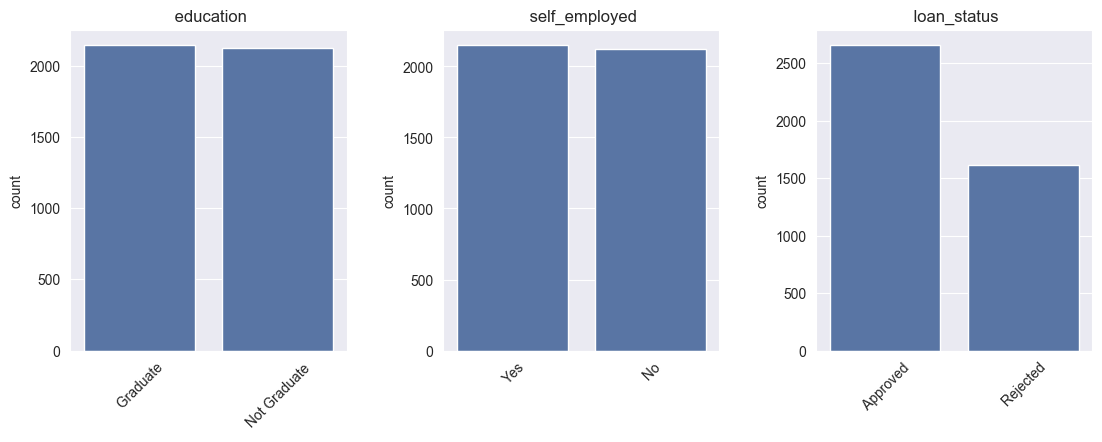

In [56]:
sns.set_style('darkgrid')
sns.set_palette(palette="deep6")

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,50))
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace = 0.1,wspace=0.35)
    sns.barplot(x=list(y.index), y=y).set_title(col)
    index +=1

In [59]:
num_cols = dataset.select_dtypes(include='number').columns
num_cols

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

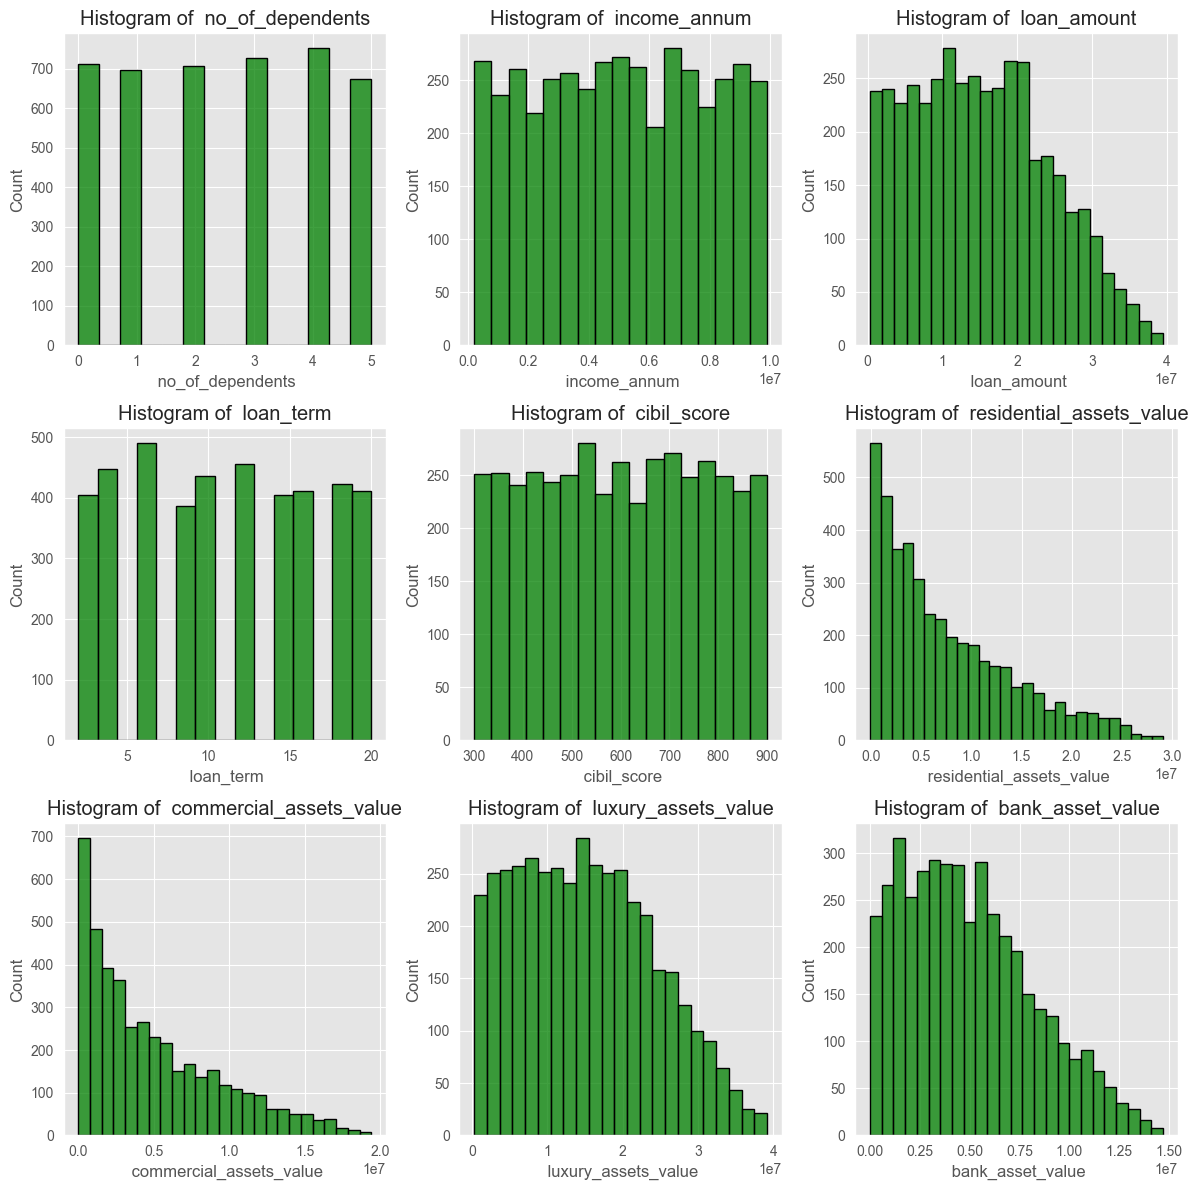

In [90]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
columns = num_cols

for i, ax in enumerate(axes.flat):
    sns.histplot(dataset[columns[i]],ax=ax,color="green",edgecolor="black", linewidth=1)
    ax.set_title(f'Histogram of {columns[i]}')

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

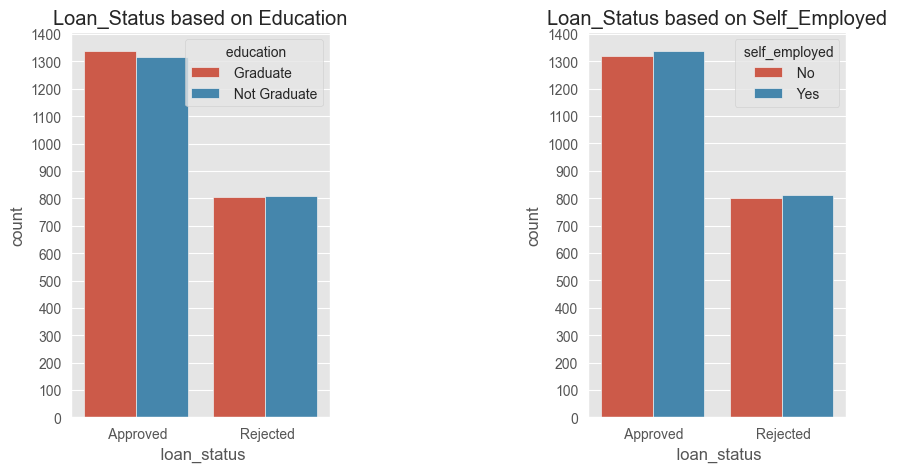

In [129]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(10,5))

fig,axes = plt.subplots(1, 2,figsize=(10,5), squeeze=False)

sns.countplot(ax=axes[0,0],x=' loan_status',hue=' education',data=dataset).set(title="Loan_Status based on Education")
axes[0,0].yaxis.set_major_locator(MaxNLocator(nbins=15)) 
plt.subplots_adjust(wspace=1, hspace=2)
sns.countplot(ax=axes[0,1],x=' loan_status',hue=' self_employed',data=dataset).set(title="Loan_Status based on Self_Employed")
axes[0,1].yaxis.set_major_locator(MaxNLocator(nbins=15)) 

In [135]:
label_encoder = preprocessing.LabelEncoder()
cols = [" education", " self_employed", " loan_status"]
for col in cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [136]:
dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


<Axes: >

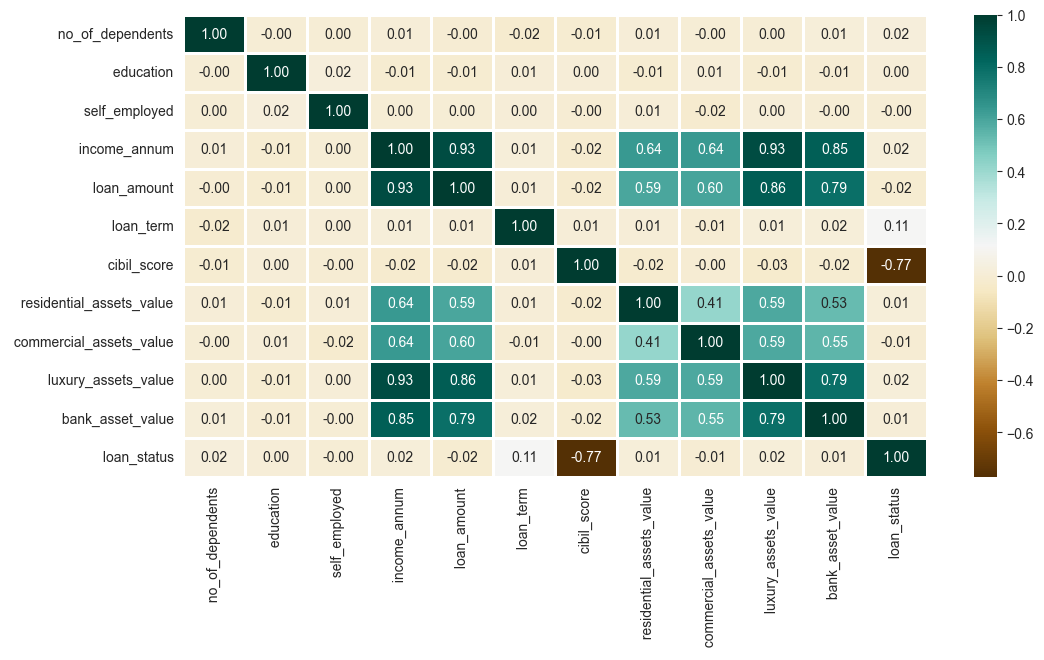

In [137]:

plt.figure(figsize=(12,6))
  
sns.heatmap(dataset.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

In [154]:
X = dataset.drop([" loan_status", " education", " self_employed"], axis=1)
y = dataset[" loan_status"]

In [155]:
X.shape, y.shape

((4269, 9), (4269,))

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [157]:
X_train.shape, y_train.shape

((3415, 9), (3415,))

In [177]:
from sklearn.metrics import classification_report
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,r2_score)
from sklearn.model_selection import cross_val_score 
def clf(model_clf,x_train, x_test, y_train, y_test):
        model_clf.fit(x_train, y_train)
        y_train_pred = model_clf.predict(x_test)
        train_accuracy = model_clf.score(x_test,y_test)
        
        class_train_rep = classification_report(y_test,y_train_pred)
        
        print(model_clf.__class__.__name__, "Train :","\n",class_train_rep)
        print("r2 score of", model_clf.__class__.__name__, "=",r2_score(y_test, y_train_pred),"\n")
        print("Cross Validation Score of", model_clf.__class__.__name__, "=",np.mean(cross_val_score(model_clf,x_train,y_train,cv=5)),"\n")
        print("Training Accuracy:",train_accuracy)

        cm = confusion_matrix(y_test,y_train_pred)
        cmhm = sns.heatmap(cm,annot=True,fmt="g")
        cmhm.set_xlabel("Predicted", labelpad=20)
        cmhm.set_ylabel("Actual", labelpad=20)

c:\Users\appclan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\appclan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\appclan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

SVC Train : 
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       521
           1       0.00      0.00      0.00       333

    accuracy                           0.61       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.37      0.61      0.46       854

r2 score of SVC = -0.6391554702495201 

Cross Validation Score of SVC = 0.6251830161054173 

Training Accuracy: 0.6100702576112412


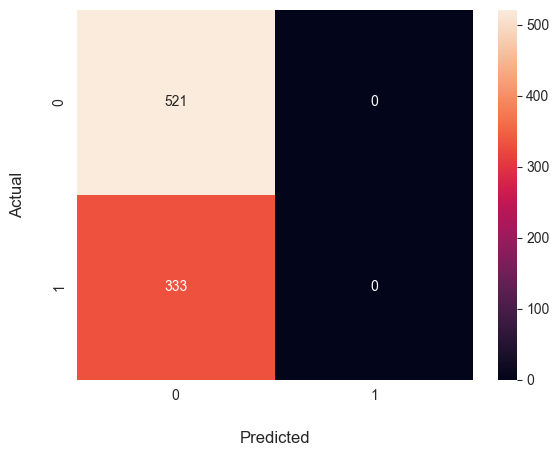

In [178]:
from sklearn.svm import SVC
SVC = SVC()
model_clf = SVC
clf(model_clf,X_train, X_test, y_train, y_test)

RandomForestClassifier Train : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       521
           1       0.99      0.97      0.98       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

r2 score of RandomForestClassifier = 0.9310865568063265 

Cross Validation Score of RandomForestClassifier = 0.9792093704245974 

Training Accuracy: 0.9836065573770492


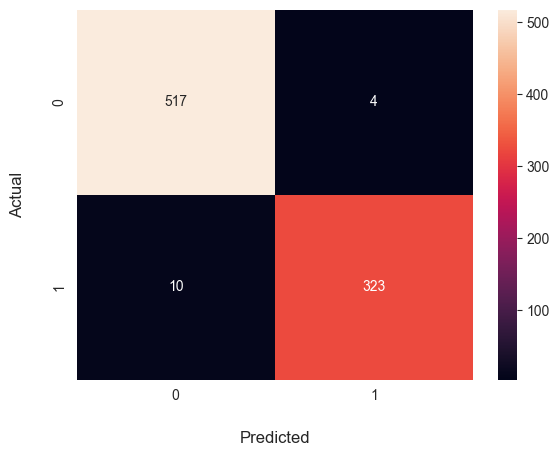

In [179]:
from sklearn.ensemble import RandomForestClassifier


RF = RandomForestClassifier()
model_clf = RF
clf(model_clf,X_train, X_test, y_train, y_test)

RandomForestClassifier Train : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       521
           1       0.99      0.98      0.98       333

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854

r2 score of RandomForestClassifier = 0.9409313344054226 

Cross Validation Score of RandomForestClassifier = 0.9759882869692534 

Training Accuracy: 0.9859484777517564


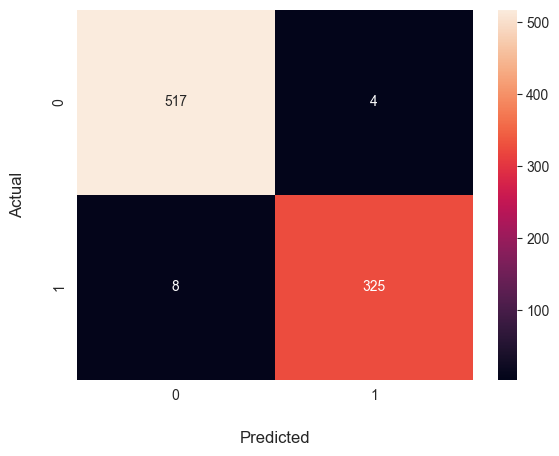

In [180]:
model_clf = RandomForestClassifier(n_jobs=-1, 
                               random_state=1, 
                               n_estimators=240,
                               max_depth=8,
                               min_impurity_decrease=1e-5)
clf(model_clf,X_train, X_test, y_train, y_test)